# Stanford CME 241 (Winter 2021) - Assignment 5

### Function Approximation Implementation - GAM

For generalized additive model (GAM), we use non-linear function $y = f(x) + \epsilon $ as the predictor function where $f(x)$ can be produced by choosing a set of basis functions $b_j$ with parameters $ \gamma_j $, i.e. $ f(x) = \displaystyle\sum_{j=1}^d b_j (x) \gamma_j $, usually $d \geq 2$. Thus, the function we use to predict is:
$$ y= \gamma_0 + \gamma_1 \cdot x + \gamma_2 \cdot x^2 + ... + \gamma_d \cdot x^d + \epsilon $$

In [8]:
import pandas as pd
import numpy as np
from pygam import LinearGAM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
redwine_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/redwine-quality.csv'
redwine = pd.read_csv(redwine_url)

In [3]:
redwine_X = redwine.drop(['quality'], axis=1).values
redwine_y = redwine['quality']

In [ ]:
lams = np.random.rand(100, 11)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(redwine_X, redwine_y, lam=lams)

<Figure size 432x288 with 0 Axes>

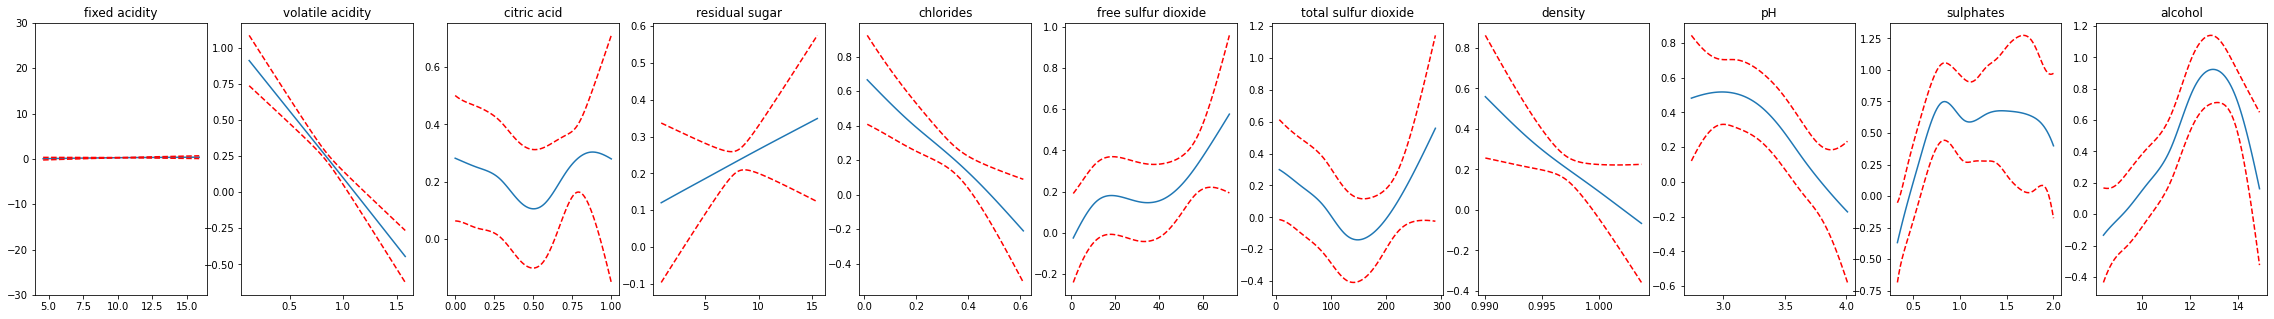

In [7]:
titles = redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(40, 5))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])